# Jonathan Halverson
# Wednesday, November 22, 2017
# Simple CNN test

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [3]:
china.shape

(427, 640, 3)

In [4]:
dataset.shape

(2, 427, 640, 3)

In [5]:
china[0]

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ..., 
       [250, 251, 255],
       [250, 251, 255],
       [250, 251, 255]], dtype=uint8)

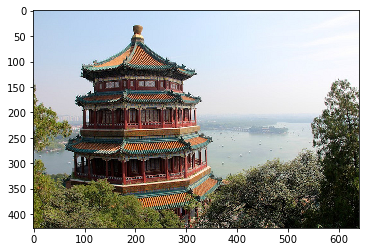

In [6]:
plt.imshow(china)

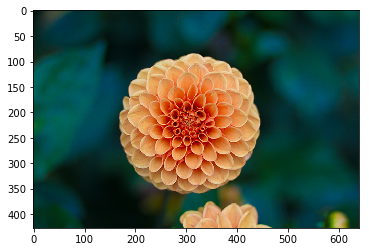

In [7]:
plt.imshow(flower)

In [8]:
# create two filters
num_filters = 2
filters = np.zeros(shape=(7, 7, channels, num_filters), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

In [9]:
filters[:, :, 0, 0] 

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.]], dtype=float32)

In [10]:
X = tf.placeholder(dtype=tf.float32, shape=(None, height, width, channels), name='X')
convolution = tf.nn.conv2d(input=X, filter=filters, strides=[1, 2, 2, 1], padding="SAME")

In [11]:
with tf.Session() as sess:
     output = sess.run(convolution, feed_dict={X:dataset})

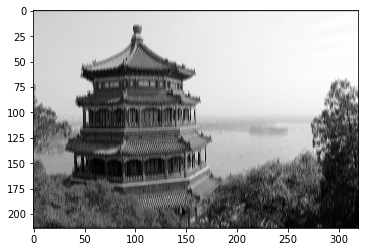

In [12]:
plt.imshow(output[0, :, :, 0], cmap='gray') # draw first image's first feature map

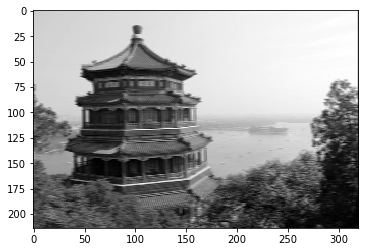

In [13]:
plt.imshow(output[0, :, :, 1], cmap='gray') # draw first image's second feature map

Notice that the output is reduced by a factor of 1/2 in both dimensions since the stride was 2.

In [14]:
#conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2], padding="SAME")

### Pooling layers

In [15]:
tf.reset_default_graph()

In [16]:
X = tf.placeholder(dtype=tf.float32, shape=(None, height, width, channels), name='X')
max_pool = tf.nn.max_pool(value=X, ksize=[1, 5, 5, 1], strides=[1, 15, 15, 1], padding="VALID")
avg_pool = tf.nn.avg_pool(value=X, ksize=[1, 5, 5, 1], strides=[1, 15, 15, 1], padding="VALID")

ksize determines the diminsions of neurons to consider in the pooling operation. Not that one cannot apply the pooling in both the intra-channel and inter-channel dimensions simultaneously.

In [17]:
with tf.Session() as sess:
     output_max, output_avg = sess.run([max_pool, avg_pool], feed_dict={X:dataset})

In [18]:
output_max[0].shape

(29, 43, 3)

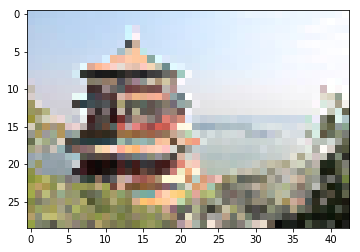

In [19]:
plt.imshow(output_max[0].astype(np.uint8)) # max pooling layer

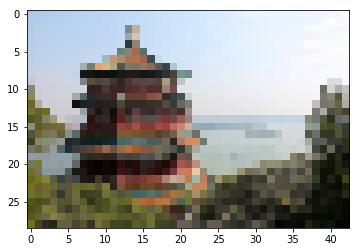

In [20]:
plt.imshow(output_avg[0].astype(np.uint8)) # average pooling layer